In [36]:
import pandas as pd
import numpy as np
import matplotlib. pyplot as plt
from math import sqrt
from math import pi
from math import exp
from random import choices

In [2]:
df = pd.read_csv('./data/data.csv')

### EXPLORATORY DATA ANALYSIS , DATA PRE-PROCESSING AND FEATURE ENGINEERING

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,k_value,l_value,m_value,percentage_free_sulphur,n_value
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,8.10,4.05,0.636,30.909091,0.6080
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0,8.68,4.34,0.778,26.800000,0.8290
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0,8.56,4.28,0.742,36.000000,0.7440
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1,11.48,5.74,0.655,35.294118,0.7195
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,8.10,4.05,0.636,30.909091,0.6080


In [4]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,k_value,l_value,m_value,percentage_free_sulphur,n_value
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0,6.800,3.4000,0.670,13.750000,0.6610
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1,6.450,3.2250,0.822,13.076923,0.7110
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1,6.810,3.4050,0.826,13.793103,0.7540
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0,6.545,3.2725,0.785,13.750000,0.6615
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,1,6.310,3.1550,0.727,23.333333,1.2075


In [5]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'k_value', 'l_value',
       'm_value', 'percentage_free_sulphur', 'n_value'],
      dtype='object')

In [6]:
#gives info, shows that there are no null values, shows the datat type and shows the number of columns and entries
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   fixed acidity            1599 non-null   float64
 1   volatile acidity         1599 non-null   float64
 2   citric acid              1599 non-null   float64
 3   residual sugar           1599 non-null   float64
 4   chlorides                1599 non-null   float64
 5   free sulfur dioxide      1599 non-null   float64
 6   total sulfur dioxide     1599 non-null   float64
 7   density                  1599 non-null   float64
 8   pH                       1599 non-null   float64
 9   sulphates                1599 non-null   float64
 10  alcohol                  1599 non-null   float64
 11  quality                  1599 non-null   int64  
 12  k_value                  1599 non-null   float64
 13  l_value                  1599 non-null   float64
 14  m_value                 

In [7]:
df['fixed acidity'].sum()

13303.1

In [8]:
df['fixed acidity'].std()

1.7410963181277006

In [9]:
#correlation matrix gives how much each column is related to the other. The farther away from the 0, the more influetial the column becomes with respect to the target label
`df.corr()

SyntaxError: invalid syntax (18016756.py, line 2)

In [10]:
#df = df.drop(['residual sugar', 'pH', 'n_value'], axis = 1)

#tried to remove 3 columns which almost just add noise to the training data. 
#Concluded this from the correlation matrix because the relation of those columns wrt 'quality' is almost 0 which means the quality is not affected much by these columns

In [11]:
#division of data to train and test in 80:20 ratio
train = df.sample(frac = 0.8, random_state = 250)
test = df.drop(train.index)
train = train.reset_index()
test = test.reset_index(drop = True) 

In [12]:
test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,k_value,l_value,m_value,percentage_free_sulphur,n_value
0,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1,11.48,5.740,0.655,35.294118,0.7195
1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,8.10,4.050,0.636,30.909091,0.6080
2,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0,8.00,4.000,0.871,60.000000,1.9375
3,8.5,0.28,0.56,1.8,0.092,35.0,103.0,0.9969,3.30,0.75,10.5,1,8.78,4.390,0.842,29.428571,0.6980
4,7.9,0.43,0.21,1.6,0.106,10.0,37.0,0.9966,3.17,0.91,9.5,0,8.33,4.165,1.016,37.000000,0.5750


In [13]:
test.shape

(320, 17)

In [14]:
#splits the given data given criteria(quality)
traing = train.groupby('quality')

In [15]:
testg = test.groupby('quality')

In [16]:
testg.count()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,k_value,l_value,m_value,percentage_free_sulphur,n_value
quality,,,,,,,,,,,,,,,,
0,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168
1,152,152,152,152,152,152,152,152,152,152,152,152,152,152,152,152


In [17]:
traing.count()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,k_value,l_value,m_value,percentage_free_sulphur,n_value
quality,,,,,,,,,,,,,,,,,
0,576,576,576,576,576,576,576,576,576,576,576,576,576,576,576,576,576
1,703,703,703,703,703,703,703,703,703,703,703,703,703,703,703,703,703


In [18]:
#reading values of the divided data into new data frames
df1 = traing.get_group(1)

In [19]:
df0 = traing.get_group(0)

<AxesSubplot:>

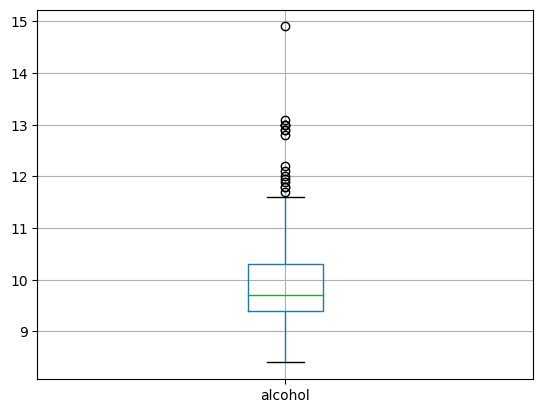

In [20]:
df0.boxplot(column='alcohol')


<AxesSubplot:>

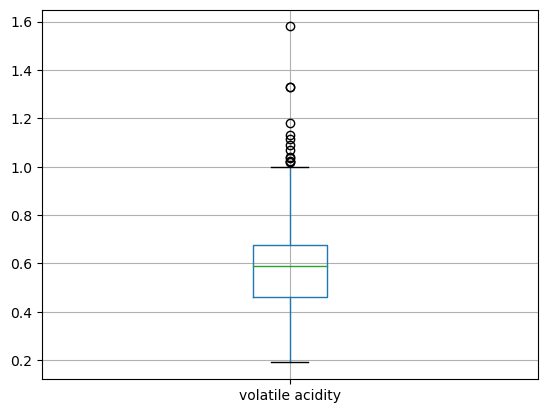

In [21]:
#outliers can be seen beyond the horizontal line
df0.boxplot(column='volatile acidity')

<AxesSubplot:>

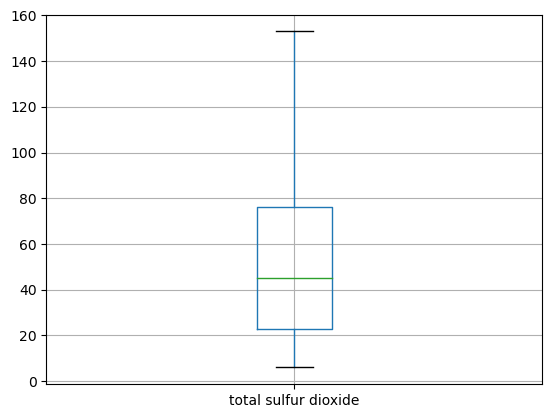

In [22]:
df0.boxplot(column='total sulfur dioxide')

<AxesSubplot:>

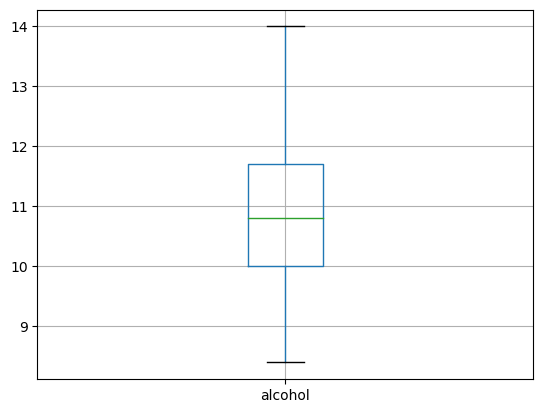

In [23]:
df1.boxplot(column='alcohol')

<AxesSubplot:>

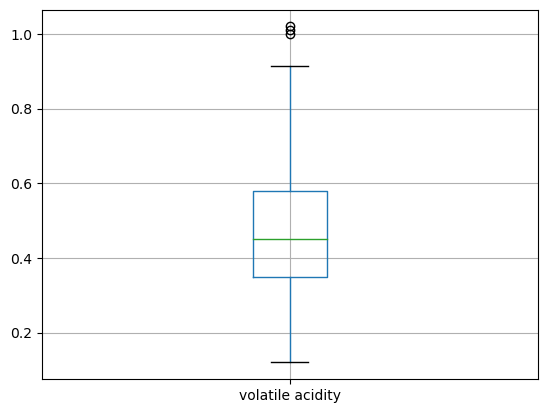

In [24]:
df1.boxplot(column='volatile acidity')

<AxesSubplot:>

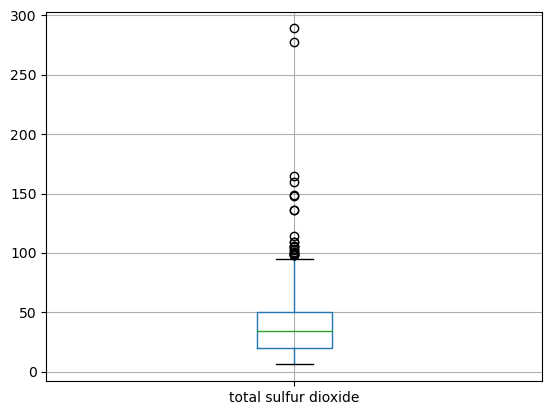

In [25]:
df1.boxplot(column='total sulfur dioxide')

In [40]:
#gaussian or normal curve distribution. Based on few of the column graphs, concluded to use gaussian naive bayes classifier
#arr = df0.iloc[3].to_numpy()
arr = df0['alcohol']
choices(arr, k=10)
#df0.hist(column=['alcohol'], bins=20, figsize=(6,4)) 



KeyError: 495

array([[<AxesSubplot:title={'center':'volatile acidity'}>]], dtype=object)

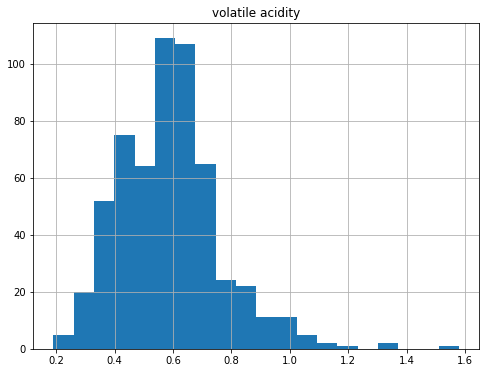

In [422]:
df0.hist(column=['volatile acidity'],bins=20, figsize=(8,6)) 

array([[<AxesSubplot:title={'center':'total sulfur dioxide'}>]],
      dtype=object)

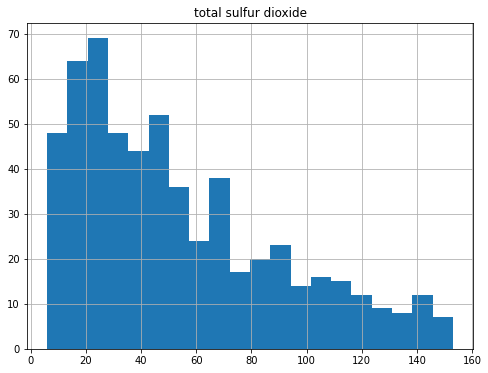

In [427]:
df0.hist(column=['total sulfur dioxide'],bins=20, figsize=(8,6)) 

array([[<AxesSubplot:title={'center':'alcohol'}>]], dtype=object)

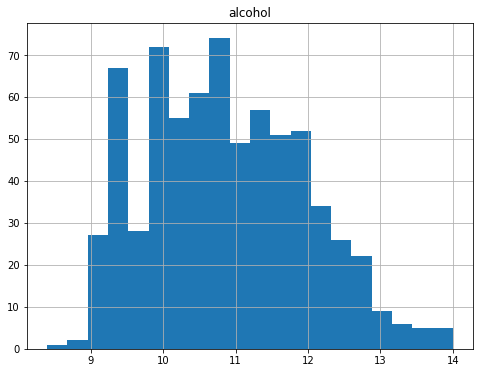

In [429]:
df1.hist(column=['alcohol'],bins=20, figsize=(8,6)) 

array([[<AxesSubplot:title={'center':'volatile acidity'}>]], dtype=object)

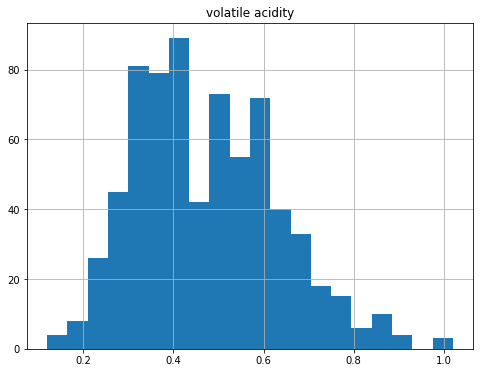

In [430]:
df1.hist(column=['volatile acidity'],bins=20, figsize=(8,6)) 

array([[<AxesSubplot:title={'center':'total sulfur dioxide'}>]],
      dtype=object)

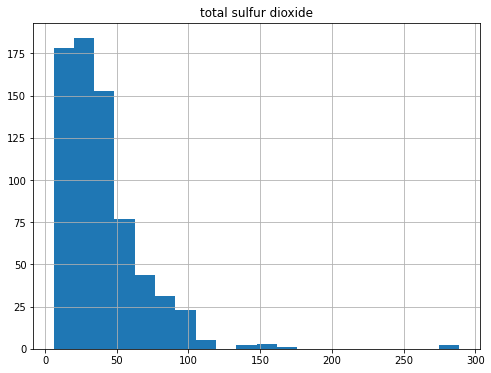

In [431]:
df1.hist(column=['total sulfur dioxide'],bins=20, figsize=(8,6)) 

In [402]:
#function which returns a dataframe free of outliers using boxplot technique
def find_outliers (df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    IQR = q3 - q1
    null_outliers_df = df[~((df > (q3 + 5*IQR)) | ( df < (q1 - 5*IQR)))] #replaces outlier values with null
    
    no_outliers = null_outliers_df.dropna().reset_index() #drops rows which contain null
    
    return no_outliers

In [403]:
#cleaned data frames free from outliers
df1_clean = find_outliers(df1)
df0_clean = find_outliers(df0)

In [345]:
df0_clean.head()

,level_0,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,k_value,l_value,m_value,percentage_free_sulphur,n_value
0,3,1418,7.8,0.53,0.01,1.6,0.077,3.0,19.0,0.99500,3.16,0.46,9.8,0,8.33,4.165,0.537,63.333333,0.5205
1,5,672,9.8,1.24,0.34,2.0,0.079,32.0,151.0,0.99800,3.15,0.53,9.5,0,11.04,5.520,0.609,47.187500,0.7075
2,8,627,8.8,0.60,0.29,2.2,0.098,5.0,15.0,0.99880,3.36,0.49,9.1,0,9.40,4.700,0.588,30.000000,0.7670
3,9,688,7.7,0.66,0.04,1.6,0.039,4.0,9.0,0.99620,3.40,0.47,9.4,0,8.36,4.180,0.509,22.500000,0.5075
4,10,850,9.3,0.43,0.44,1.9,0.085,9.0,22.0,0.99708,3.28,0.55,9.5,0,9.73,4.865,0.635,24.444444,0.7005


In [404]:
print("num of outliers dropped in class-0: {0}".format(len(df0) - len(df0_clean)))
print("num of outliers dropped in class-1: {0}".format(len(df1) - len(df1_clean)))

num of outliers dropped in class-0: 34
num of outliers dropped in class-1: 38


### MODEL LEARNING

In [405]:
#calculates the mean and standard deviation of all columns of df0_clean and df1_clean
cols = ['fixed acidity', 'volatile acidity', 'citric acid','residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH',
        'sulphates', 'alcohol', 'k_value', 'l_value',
       'm_value', 'percentage_free_sulphur', 'n_value']

m0 = df0_clean[cols].mean()
m1 = df1_clean[cols].mean()
s0 = df0_clean[cols].std()
s1 = df1_clean[cols].std()

In [118]:
#checking mean for quality = 0 group
m0

fixed acidity               8.119900
volatile acidity            0.593545
citric acid                 0.232809
residual sugar              2.522241
chlorides                   0.091303
free sulfur dioxide        16.578595
total sulfur dioxide       55.260870
density                     0.997064
pH                          3.315301
sulphates                   0.614080
alcohol                     9.911622
quality                     0.000000
k_value                     8.713445
l_value                     4.356722
m_value                     0.705383
percentage_free_sulphur    35.862707
n_value                     0.848885
dtype: float64

In [119]:
#checking mean for quality = 1 group
m1

fixed acidity               8.493686
volatile acidity            0.478957
citric acid                 0.299471
residual sugar              2.521733
chlorides                   0.082483
free sulfur dioxide        15.174743
total sulfur dioxide       39.161527
density                     0.996479
pH                          3.309310
sulphates                   0.690235
alcohol                    10.860768
quality                     1.000000
k_value                     8.972643
l_value                     4.486322
m_value                     0.772718
percentage_free_sulphur    29.711380
n_value                     0.857656
dtype: float64

In [120]:
#checking standard deviation for quality = 0 group
s0

fixed acidity               1.509109
volatile acidity            0.180974
citric acid                 0.179167
residual sugar              1.350525
chlorides                   0.049863
free sulfur dioxide        10.585997
total sulfur dioxide       36.564136
density                     0.001592
pH                          0.152041
sulphates                   0.170121
alcohol                     0.731622
quality                     0.000000
k_value                     1.484958
l_value                     0.742479
m_value                     0.197332
percentage_free_sulphur    18.344106
n_value                     0.412729
dtype: float64

In [435]:
#checking standard deviation for quality = 1 group
s1

fixed acidity               1.882536
volatile acidity            0.159471
citric acid                 0.200861
residual sugar              0.793944
chlorides                   0.019654
free sulfur dioxide         9.569358
total sulfur dioxide       23.630196
density                     0.002011
pH                          0.154585
sulphates                   0.135218
alcohol                     1.084174
k_value                     1.839804
l_value                     0.919902
m_value                     0.136804
percentage_free_sulphur    12.725280
n_value                     0.251319
dtype: float64

In [406]:
#getting the class probabilities
P0 = len(df0_clean)/ (len(df0_clean) + len(df1_clean)) #class-0 probability
P1 = len(df1_clean)/ (len(df0_clean) + len(df1_clean)) #class-1 probability
print("P0 :{0} , P1 :{1} ".format(P0, P1))

P0 :0.4490472245236123 , P1 :0.5509527754763878 


In [349]:
len(df1_clean)

644

In [407]:
#an array to record the quality values of the test data, so that i can compare predicted values to this array and calculate accuracy
actual = test.quality.tolist()

In [408]:
#dropping the quality column from the test data
test = test.drop(['quality'], axis = 1)
test.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,k_value,l_value,m_value,percentage_free_sulphur,n_value
0,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,11.48,5.740,0.655,35.294118,0.7195
1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,8.10,4.050,0.636,30.909091,0.6080
2,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,8.00,4.000,0.871,60.000000,1.9375
3,8.5,0.28,0.56,1.8,0.092,35.0,103.0,0.9969,3.30,0.75,10.5,8.78,4.390,0.842,29.428571,0.6980
4,7.9,0.43,0.21,1.6,0.106,10.0,37.0,0.9966,3.17,0.91,9.5,8.33,4.165,1.016,37.000000,0.5750


### PREDICTION AND ACCURACY

In [387]:
#function which gives treturns the probability for a given value with the help of standard deviation and mean for that column
def given_class_prob(x, mean, std):
    expo = exp(-((x-mean)**2 / (2 * std**2 )))
    return (1 / (sqrt(2 * pi) * std)) * expo

In [409]:
#applying bayes probability and comparing bayes probability values against quality = 0 and quality = 1. It should be done for each test row
#Ex:P(class=0|X1, X2,X3...) = P(X1|class = 0)*P(X2|class = 0)*P(X3|class = 0)...*P(class=0)
pred = []
for i in range(len(test)):
    if ((given_class_prob(test.loc[i,"fixed acidity"], m0[0], s0[0])*
    given_class_prob(test.loc[i,"volatile acidity"], m0[1], s0[1])*
    given_class_prob(test.loc[i,"citric acid"], m0[2], s0[2])*
    given_class_prob(test.loc[i,"residual sugar"], m0[3], s0[3])*
    given_class_prob(test.loc[i,"chlorides"], m0[4], s0[4])*
    given_class_prob(test.loc[i,"free sulfur dioxide"], m0[5], s0[5])*
    given_class_prob(test.loc[i,"total sulfur dioxide"], m0[6], s0[6])*
    given_class_prob(test.loc[i,"density"], m0[7], s0[7])*
    given_class_prob(test.loc[i,"pH"], m0[8], s0[8])*
    given_class_prob(test.loc[i,"sulphates"], m0[9], s0[9])*
    given_class_prob(test.loc[i,"alcohol"], m0[10], s0[10])*
    given_class_prob(test.loc[i,"k_value"], m0[11], s0[11])*
    given_class_prob(test.loc[i,"l_value"], m0[12], s0[12])*
    given_class_prob(test.loc[i,"m_value"], m0[13], s0[13])*
    given_class_prob(test.loc[i,"percentage_free_sulphur"], m0[14], s0[14])*
    given_class_prob(test.loc[i,"n_value"], m0[15], s0[15])* P0) > 
        
    (given_class_prob(test.loc[i,"fixed acidity"], m1[0], s1[0])*
    given_class_prob(test.loc[i,"volatile acidity"], m1[1], s1[1])*
    given_class_prob(test.loc[i,"citric acid"], m1[2], s1[2])*
    given_class_prob(test.loc[i,"residual sugar"], m1[3], s1[3])*
    given_class_prob(test.loc[i,"chlorides"], m1[4], s1[4])*
    given_class_prob(test.loc[i,"free sulfur dioxide"], m1[5], s1[5])*
    given_class_prob(test.loc[i,"total sulfur dioxide"], m1[6], s1[6])*
    given_class_prob(test.loc[i,"density"], m1[7], s1[7])*
    given_class_prob(test.loc[i,"pH"], m1[8], s1[8])*
    given_class_prob(test.loc[i,"sulphates"], m1[9], s1[9])*
    given_class_prob(test.loc[i,"alcohol"], m1[10], s1[10])*    
    given_class_prob(test.loc[i,"k_value"], m1[11], s1[11])*
    given_class_prob(test.loc[i,"l_value"], m1[12], s1[12])*
    given_class_prob(test.loc[i,"m_value"], m1[13], s1[13])*
    given_class_prob(test.loc[i,"percentage_free_sulphur"], m1[14], s1[14])*
    given_class_prob(test.loc[i,"n_value"], m1[15], s1[15])*P1)):
        
        
        pred.append(0)
        
    else: 
        pred.append(1)

In [125]:
len(pred)

320

In [410]:
#prints model accuracy
matched = 0
for i in range(len(pred)):
    if(pred[i] == actual[i]):
        matched = matched + 1

accuracy = matched*100 / len(pred)        
print(accuracy) 

77.1875


In [417]:
#gives the confusion matrix
confusion_matrix = pd.crosstab(actual, pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
confusion_matrix

Predicted,0,1,All
Actual,,,
0,139,29,168
1,44,108,152
All,183,137,320
